In [ ]:
#!pip install matplotlib numpy pillow opencv-python --no-index
#!pip install scikit-learn tensorboard pytorch-lightning comet-ml --no-index
#!pip install --upgrade --force-reinstall torch torchvision --no-index

In [11]:
import pytorch_lightning


In [12]:



import os

list = os.listdir('/localscratch/abhinav1.31700289.0/gt_fin_gs/gt_fin_gs/test/images/') # dir is your directory path
number_files = len(list)
print(number_files)

83849


## Imports

In [13]:
import torch
import os
import random
import numpy as np

from PIL import Image
from glob import glob
from tqdm import tqdm
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import json
import pytorch_lightning as pl
from model import gazetrack_model
from gazetrack_data import gazetrack_dataset

#root = os.environ['SLURM_TMPDIR']

In [14]:
import colorsys

def get_colors(num_colors):
    colors=[]
    for i in np.arange(0., 360., 360. / num_colors):
        hue = i/360.
        lightness = (50 + np.random.rand() * 10)/100.
        saturation = (90 + np.random.rand() * 10)/100.
        colors.append(colorsys.hls_to_rgb(hue, lightness, saturation))
    return colors

def euc(a, b):
    return np.sqrt(np.sum(np.square(a - b), axis=1))

## Load model and weights

In [15]:
model = gazetrack_model()
if(torch.cuda.is_available()):
    dev = torch.device('cuda:0')
else:
    dev = torch.device('cpu')
    
weights = torch.load("/home/abhinav1/exp_100epoch_gs_updated/epoch=92-val_loss=1.460-train_loss=1.306.ckpt", map_location=dev)['state_dict']
model.load_state_dict(weights)
model.to(dev)
model.eval()

gazetrack_model(
  (eye_model): eye_model(
    (model): Sequential(
      (0): Conv2d(3, 32, kernel_size=(7, 7), stride=(2, 2))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01, inplace=True)
      (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
      (4): Dropout(p=0.02, inplace=False)
      (5): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2))
      (6): BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (7): LeakyReLU(negative_slope=0.01, inplace=True)
      (8): AvgPool2d(kernel_size=2, stride=2, padding=0)
      (9): Dropout(p=0.02, inplace=False)
      (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (12): LeakyReLU(negative_slope=0.01, inplace=True)
      (13): AvgPool2d(kernel_size=2, stride=2, padding=0)
      (14): Dropout(p=0.02, inplace=False)
    )

## Run predictions on entire test set

In [6]:
file_root = "/home/abhinav1/Users/00503/images/"
test_dataset = gazetrack_dataset(file_root, phase='test')
test_dataloader = DataLoader(test_dataset, batch_size=256, num_workers=8, pin_memory=False, shuffle=False,)

preds, gt = [], []
for j in tqdm(test_dataloader):
    leye, reye, kps, target = j[1].to(dev), j[2].to(dev), j[3].to(dev), j[4].to(dev)
    
    with torch.no_grad():
        pred = model(leye, reye, kps)
    pred = pred.cpu().detach().numpy()
    preds.extend(pred)  
    
    gt.extend(target.cpu().detach().numpy())
    
preds = np.array(preds)
pts = np.unique(gt, axis=0)

gt = np.array(gt)
dist = euc(preds, gt)
print("Mean Euclidean Distance: ", dist.mean())

Num files for test = 965


100%|██████████| 4/4 [00:23<00:00,  5.91s/it]

Mean Euclidean Distance:  1.3285896


In [5]:
all_files = glob("/localscratch/abhinav1.31692431.0/gt_fin_gs/gt_fin_gs/test/images/*.jpg")
all_files = [i[:-10] for i in all_files]
files = np.unique(all_files)
print('Found ', len(all_files), ' images from ', len(files), ' subjects.')

Found  83849  images from  1233  subjects.


In [17]:
dicts={}

In [18]:
for i in range(1232):
    idx=i
    meta = json.load(open(glob(files[idx].replace('images', 'meta')+"*.json")[0]))
    dicts[idx]=len(glob(files[idx]+"*.jpg"))
    if(i%200==0):
        print(i)

0
200
400
600
800
1000
1200


In [32]:
model = gazetrack_model()
if(torch.cuda.is_available()):
    dev = torch.device('cuda:0')
else:
    dev = torch.device('cpu')
    
weights = torch.load("/home/abhinav1/exp_100epoch_gs_updated/epoch=91-val_loss=1.493-train_loss=1.309.ckpt", map_location=dev)['state_dict']
model.load_state_dict(weights)
model.to(dev)
model.eval()

gazetrack_model(
  (eye_model): eye_model(
    (model): Sequential(
      (0): Conv2d(3, 32, kernel_size=(7, 7), stride=(2, 2))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01, inplace=True)
      (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
      (4): Dropout(p=0.02, inplace=False)
      (5): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2))
      (6): BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (7): LeakyReLU(negative_slope=0.01, inplace=True)
      (8): AvgPool2d(kernel_size=2, stride=2, padding=0)
      (9): Dropout(p=0.02, inplace=False)
      (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (12): LeakyReLU(negative_slope=0.01, inplace=True)
      (13): AvgPool2d(kernel_size=2, stride=2, padding=0)
      (14): Dropout(p=0.02, inplace=False)
    )

device:  iPhone 6
id:  723
Num files:  159
Sample:


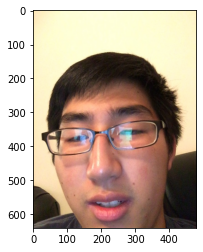

In [33]:
idx=723
#idx = np.random.randint(len(files))
meta = json.load(open(glob(files[idx].replace('images', 'meta')+"*.json")[0]))
print("device: ", meta['device'])
print("id: ", idx)
print("Num files: ", len(glob(files[idx]+"*.jpg")))
print("Sample:")
plt.imshow(plt.imread(glob(files[idx]+"*.jpg")[0]))

In [34]:
preds, gt = [], []
ctr = 1
f = files[idx]
#f = '/localscratch/abhinav1.31381192.0/gazetrack/gazetrack/train/images/'
# f = root+'/dataset/train/images/'
fs = glob(f+"*.jpg")
test_dataset = gazetrack_dataset(f, phase='test')
test_dataloader = DataLoader(test_dataset, batch_size=256, num_workers=8, pin_memory=False, shuffle=False,)

for j in tqdm(test_dataloader):
    leye, reye, kps, target = j[1].to(dev), j[2].to(dev), j[3].to(dev), j[4].to(dev)
    
    with torch.no_grad():
        pred = model(leye, reye, kps)
    pred = pred.cpu().detach().numpy()
    preds.extend(pred)  
    
    gt.extend(target.cpu().detach().numpy())
    
preds = np.array(preds)
pts = np.unique(gt, axis=0)

c = get_colors(len(pts))
random.shuffle(c)

gt = np.array(gt)
dist = euc(preds, gt)
print("Mean Euclidean Distance: ", dist.mean())

Num files for test = 159


100%|██████████| 1/1 [00:01<00:00,  1.75s/it]

Mean Euclidean Distance:  2.285328


(-13.0, 0.2)

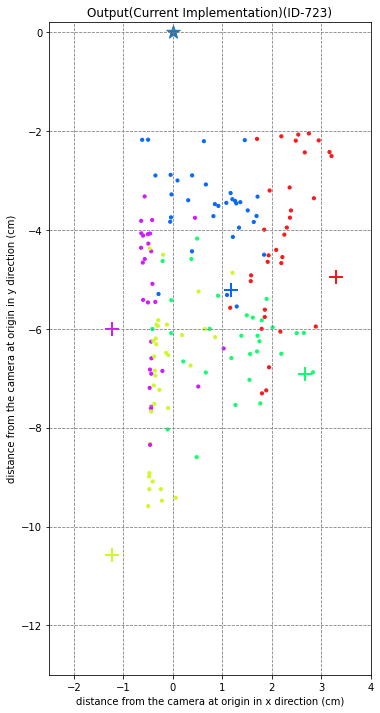

In [35]:
cols = np.zeros((len(gt),3))
for i in range(len(pts)):
    cols[np.where(np.all(gt==pts[i],axis=1))] = c[i]
    
plt.figure(figsize=(12,12))
plt.grid(color='gray', linestyle='dashed')
plt.scatter(0, 0, marker='*', s=200)
plt.scatter(preds[:,0], preds[:,1], c=cols, s=10)
plt.scatter(gt[:,0], gt[:,1], c=cols, marker='+', s=200)
plt.title('Output(Current Implementation)(ID-723)')
plt.xlabel('distance from the camera at origin in x direction (cm)')
plt.ylabel('distance from the camera at origin in y direction (cm)')
plt.axis('scaled')
plt.xlim(-2.5, 4)
plt.ylim(-13, 0.2)

In [36]:
model = gazetrack_model()
if(torch.cuda.is_available()):
    dev = torch.device('cuda:0')
else:
    dev = torch.device('cpu')
    
weights = torch.load("/home/abhinav1/projects/def-skrishna/beluga_backup/gaze-track/Checkpoints/GoogleCheckpoint_GoogleSplit.ckpt", map_location=dev)['state_dict']
model.load_state_dict(weights)
model.to(dev)
model.eval()

gazetrack_model(
  (eye_model): eye_model(
    (model): Sequential(
      (0): Conv2d(3, 32, kernel_size=(7, 7), stride=(2, 2))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01, inplace=True)
      (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
      (4): Dropout(p=0.02, inplace=False)
      (5): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2))
      (6): BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (7): LeakyReLU(negative_slope=0.01, inplace=True)
      (8): AvgPool2d(kernel_size=2, stride=2, padding=0)
      (9): Dropout(p=0.02, inplace=False)
      (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (12): LeakyReLU(negative_slope=0.01, inplace=True)
      (13): AvgPool2d(kernel_size=2, stride=2, padding=0)
      (14): Dropout(p=0.02, inplace=False)
    )

device:  iPhone 6
id:  723
Num files:  159
Sample:


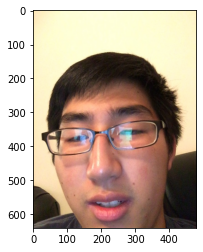

In [37]:

#idx = np.random.randint(len(files))
meta = json.load(open(glob(files[idx].replace('images', 'meta')+"*.json")[0]))
print("device: ", meta['device'])
print("id: ", idx)
print("Num files: ", len(glob(files[idx]+"*.jpg")))
print("Sample:")
plt.imshow(plt.imread(glob(files[idx]+"*.jpg")[0]))

In [38]:
preds, gt = [], []
ctr = 1
f = files[idx]
#f = '/localscratch/abhinav1.31381192.0/gazetrack/gazetrack/train/images/'
# f = root+'/dataset/train/images/'
fs = glob(f+"*.jpg")
test_dataset = gazetrack_dataset(f, phase='test')
test_dataloader = DataLoader(test_dataset, batch_size=256, num_workers=10, pin_memory=False, shuffle=False,)

for j in tqdm(test_dataloader):
    leye, reye, kps, target = j[1].to(dev), j[2].to(dev), j[3].to(dev), j[4].to(dev)
    
    with torch.no_grad():
        pred = model(leye, reye, kps)
    pred = pred.cpu().detach().numpy()
    preds.extend(pred)  
    
    gt.extend(target.cpu().detach().numpy())
    
preds = np.array(preds)
pts = np.unique(gt, axis=0)



gt = np.array(gt)
dist = euc(preds, gt)
print("Mean Euclidean Distance: ", dist.mean())

Num files for test = 159


100%|██████████| 1/1 [00:02<00:00,  2.19s/it]

Mean Euclidean Distance:  2.4191983


(-13.0, 0.2)

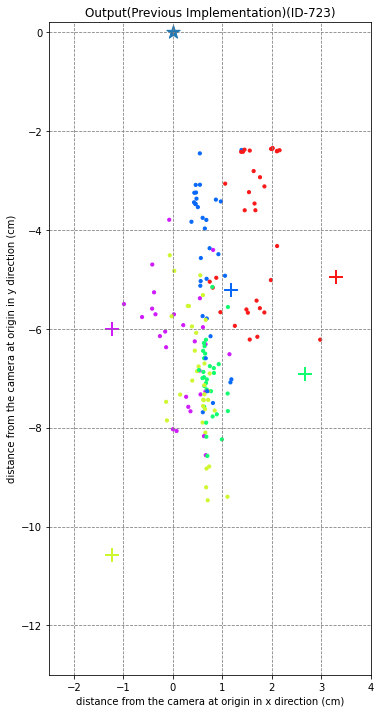

In [39]:
cols = np.zeros((len(gt),3))
for i in range(len(pts)):
    cols[np.where(np.all(gt==pts[i],axis=1))] = c[i]
    
plt.figure(figsize=(12,12))
plt.grid(color='gray', linestyle='dashed')
plt.scatter(0, 0, marker='*', s=200)
plt.scatter(preds[:,0], preds[:,1], c=cols, s=10)
plt.scatter(gt[:,0], gt[:,1], c=cols, marker='+', s=200)
plt.title('Output(Previous Implementation)(ID-723)')
plt.xlabel('distance from the camera at origin in x direction (cm)')
plt.ylabel('distance from the camera at origin in y direction (cm)')
plt.axis('scaled')
plt.xlim(-2.5, 4)
plt.ylim(-13, 0.2)

## Total Test

In [26]:
total_test = {}
for idx in tqdm(range(len(files))):
    preds, gt = [], []
    ctr = 1
    f = files[idx]
    test_dataset = gazetrack_dataset(f, phase='test', v=False)
    test_dataloader = DataLoader(test_dataset, batch_size=30, num_workers=10, pin_memory=False, shuffle=False,)

    for j in test_dataloader:
        leye, reye, kps, target = j[1].to(dev), j[2].to(dev), j[3].to(dev), j[4].to(dev)

        with torch.no_grad():
            pred = model(leye, reye, kps)
        pred = pred.cpu().detach().numpy()
        preds.extend(pred)  

        gt.extend(target.cpu().detach().numpy())

    preds = np.array(preds)
    pts = np.unique(gt, axis=0)

    gt = np.array(gt)
    dist = euc(preds, gt)
    total_test[idx] = [dist, gt, preds, pts]

  0%|          | 5/1233 [00:06<27:57,  1.37s/it]Exception ignored in: <function _releaseLock at 0x2b931e86a820>
Traceback (most recent call last):
  File "/cvmfs/soft.computecanada.ca/easybuild/software/2020/avx512/Core/python/3.8.2/lib/python3.8/logging/__init__.py", line 223, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 
  0%|          | 5/1233 [00:13<53:43,  2.63s/it]


RuntimeError: DataLoader worker (pid(s) 135872, 135912, 135952, 135992, 136032, 136072, 136112, 136152, 136193) exited unexpectedly

In [ ]:
mean_errs = []
for i in total_test:
    mean_errs.append(np.mean(total_test[i][0]))
    
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter([i for i in range(len(mean_errs))], mean_errs, s=10)
plt.hlines(y=np.mean(mean_errs), xmin=0, xmax=len(mean_errs), color='r')
plt.xlabel('Subject id')
plt.ylabel('Mean Euclidean Distance')
plt.subplot(1,2,2)
plt.scatter([i for i in range(len(mean_errs))], [len(total_test[i][0]) for i in total_test], s=30)
plt.xlabel('Subject id')
plt.ylabel('Number of datapoints')
np.mean(mean_errs)

In [ ]:
np.std(mean_errs)/np.sqrt(len(mean_errs))

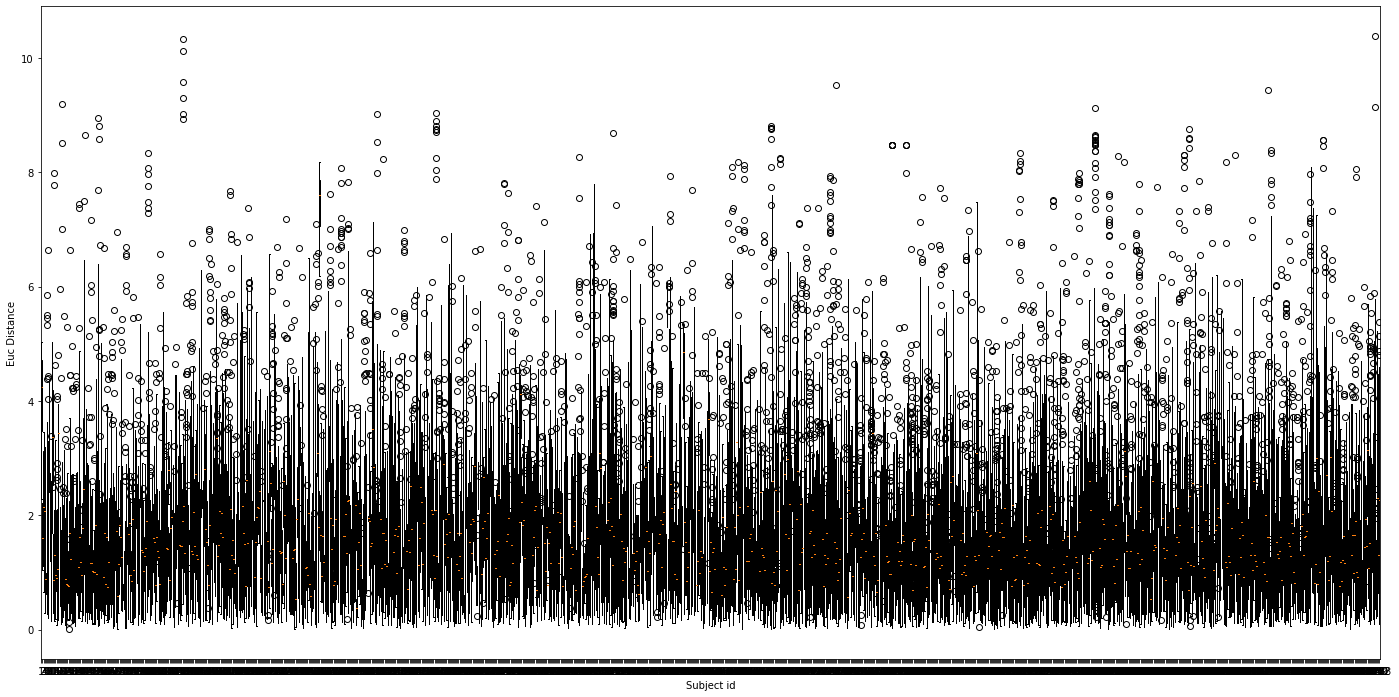

In [24]:
dists = [total_test[i][0] for i in total_test]
plt.figure(figsize=(24,12))
plt.boxplot(dists)
plt.xlabel('Subject id')
plt.ylabel('Euc Distance')
a=1

1.6357095

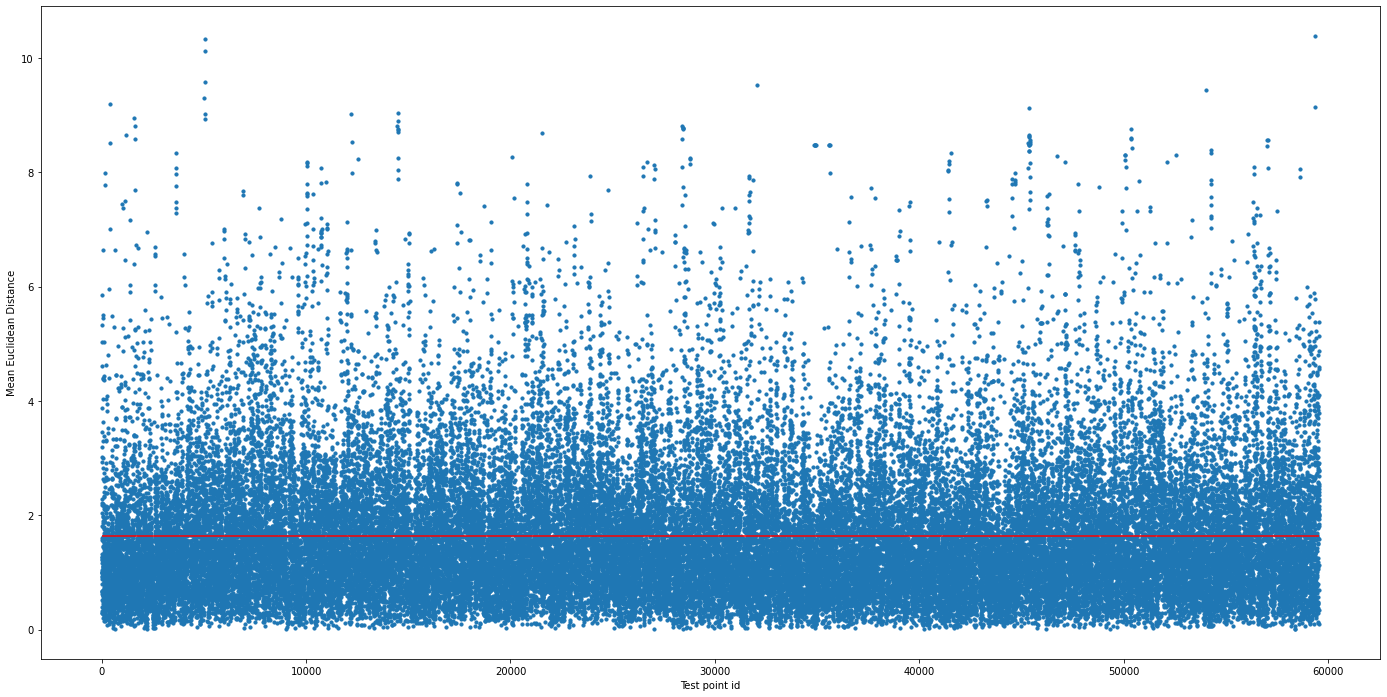

In [25]:
mean_errs = []
for i in total_test:
    mean_errs.extend(total_test[i][0])
plt.figure(figsize=(24, 12))
plt.scatter([i for i in range(len(mean_errs))], mean_errs, s=10)
plt.hlines(y=np.mean(mean_errs), xmin=0, xmax=len(mean_errs), color='r')
plt.xlabel('Test point id')
plt.ylabel('Mean Euclidean Distance')
np.mean(mean_errs)

(-13.0, 0.2)

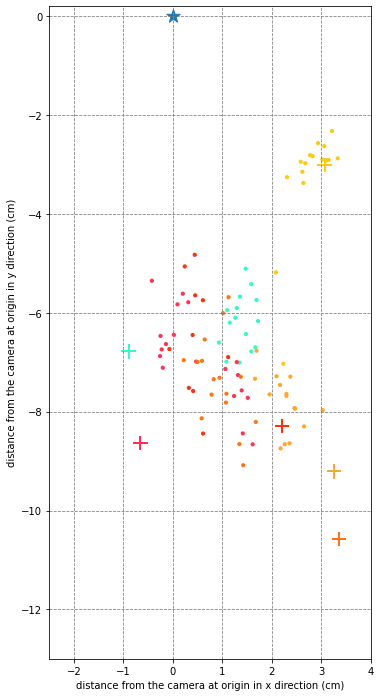

In [28]:
pts = np.unique(gt, axis=0)
cols = np.zeros((len(gt),3))
for i in range(len(pts)):
    cols[np.where(np.all(gt==pts[i],axis=1))] = c[i]
    
plt.figure(figsize=(12,12))
plt.grid(color='gray', linestyle='dashed')
plt.scatter(0, 0, marker='*', s=200)
plt.scatter(preds[:,0], preds[:,1], c=cols, s=10)
plt.scatter(gt[:,0], gt[:,1], c=cols, marker='+', s=200)
plt.xlabel('distance from the camera at origin in x direction (cm)')
plt.ylabel('distance from the camera at origin in y direction (cm)')
plt.axis('scaled')
plt.xlim(-2.5, 4)
plt.ylim(-13, 0.2)

In [ ]:
preds